In [50]:
from TSP_Formulation_Methods import *
import numpy as np
import glob
import os

distances_original_matrix = np.loadtxt("./data/matriz-rutas-granada")


# Global parameters

N = 5 # Number of stops
p = 2 # Number of travels, aka number of edges. The number of involucred stops is then p+1
num_reads = 4000

startNodes = [0,2]
endNodes = [1,4]
L = len(startNodes)

script_dir = os.getcwd()
concrete_simulations = "lambdas"
files_to_find = os.path.join(script_dir, f"data/lamdasOptimized/{concrete_simulations}*")
list_of_files = glob.glob(files_to_find)

all_lambdas = [load_lambda_means(list_of_files) for l in range(L)]
# process parameters

p = min(p, N-1)
startNodes = [min(N-1, s) for s in startNodes]
endNodes = [min(N-1, s) for s in endNodes]


distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])

All solutions are valid.
Cost of the solution:  2.2326051895750427
Q is symmetric


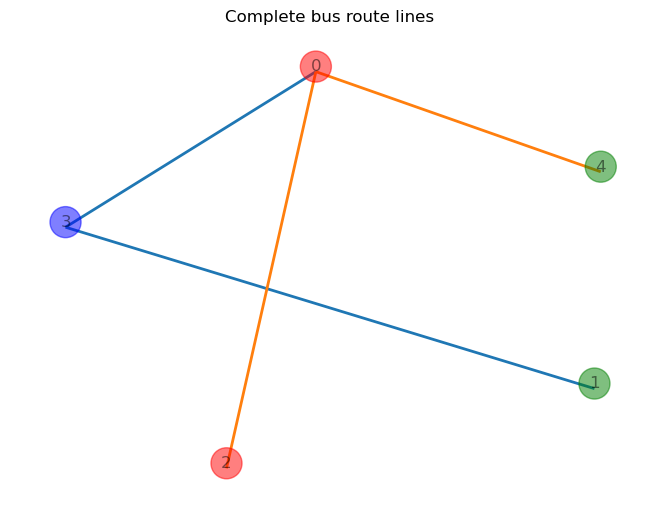

In [51]:
# Try to solve in an uniformed way (informed way is removing the stops used in the previous line)


solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)

check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L)

solution_cost = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)

print("Cost of the solution: ", solution_cost)

Q_matrix_optimal,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNodes[0], endNodes[0], all_lambdas[0])

if is_symmetric(Q_matrix_optimal):
    print("Q is symmetric")
    #np.savetxt("./data/Q_matrix_optimal", Q_matrix_optimal)

draw_multiple_solutions_graph(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, startNodes, endNodes)

In [52]:
# Try to solve in an uniformed way trying different start and end nodes and minimizing the total distance

all_start_end_combinations = generate_all_start_end_combinations(N, L)

best_solution = None
best_solution_cost = 1000 # Silly high value
best_solution_startNodes = None
best_solution_endNodes = None
print("Longitude of all_start_end_combinations: ", len(all_start_end_combinations), "\n")
num_reads = 100
for index, (startNodes, endNodes) in enumerate(all_start_end_combinations):
    solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)
    total_distance = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)
    if check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L, returnFormat=True):
        print("Valid solution found")
        print("Total distance: ", total_distance)
        print("Start nodes: ", startNodes)
        print("End nodes: ", endNodes)
        print(f"Still {len(all_start_end_combinations)-index} combinations to check. Looking for the best solution\n")
        if best_solution_cost > total_distance:
            best_solution = solutions_multiple_lines_uninformed
            best_solution_cost = total_distance
            best_solution_startNodes = startNodes
            best_solution_endNodes = endNodes

    if best_solution is None:
        best_solution = solutions_multiple_lines_uninformed
        best_solution_cost = total_distance
        best_solution_startNodes = startNodes
        best_solution_endNodes = endNodes

# all_lambdas_fine_tunning = [load_lambda_means("lambdas_N_{}_p_{}_startNode_{}_endNode_{}".format(N,p,startNodes[l],endNodes[l])) for l in range(L)]
print("Best solution cost: ", best_solution_cost)
print("Best solution startNodes: ", best_solution_startNodes)
print("Best solution endNodes: ", best_solution_endNodes)
check_multiline_validity(best_solution, N, p, best_solution_startNodes, best_solution_endNodes, L)


Longitude of all_start_end_combinations:  55 

Valid solution found
Total distance:  2.826762861805377
Start nodes:  [0 1]
End nodes:  [2 3]
Still 55 combinations to check. Looking for the best solution

Valid solution found
Total distance:  2.826762861805377
Start nodes:  [0 1]
End nodes:  [2 3]
Still 54 combinations to check. Looking for the best solution

Valid solution found
Total distance:  3.0975502686401937
Start nodes:  [0 1]
End nodes:  [2 4]
Still 53 combinations to check. Looking for the best solution

Valid solution found
Total distance:  3.0975502686401937
Start nodes:  [0 1]
End nodes:  [2 4]
Still 52 combinations to check. Looking for the best solution

Valid solution found
Total distance:  2.419985303520475
Start nodes:  [0 1]
End nodes:  [4 2]
Still 47 combinations to check. Looking for the best solution

Valid solution found
Total distance:  2.419985303520475
Start nodes:  [0 1]
End nodes:  [4 2]
Still 46 combinations to check. Looking for the best solution

Valid sol

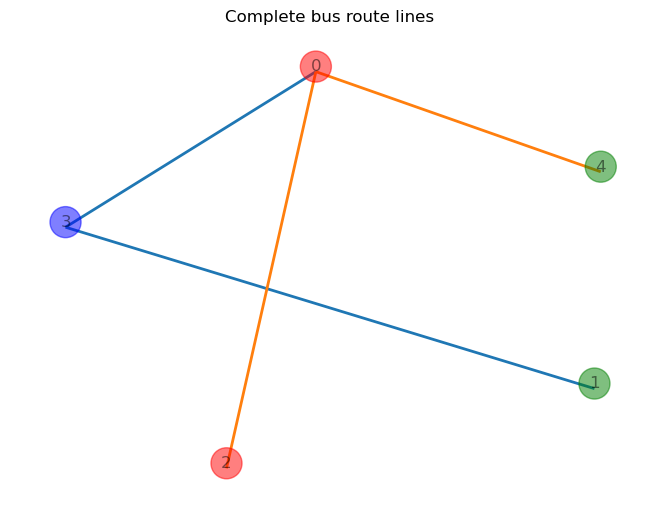

In [53]:
draw_multiple_solutions_graph(best_solution, distances_N_stops_normalized, p, best_solution_startNodes, best_solution_endNodes)